#$Imports$
----
`Required Imports`

---

In [2]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

#$Data$
---
`Collecting the Fashion Mnist data and going through basic Preprocessing`

---

In [3]:
class_names = ["T_shirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [4]:
(X_train_FMnist,Y_train_FMnist), (X_test_FMnist, Y_test_FMnist) = keras.datasets.fashion_mnist.load_data()
X_train_FMnist = X_train_FMnist / 255.0
X_test = X_test_FMnist / 255.0

In [5]:
X_train = X_train_FMnist[:40000]
X_valid = X_train_FMnist[40000:]
Y_train = Y_train_FMnist[:40000]
Y_valid = Y_train_FMnist[40000:]

In [6]:
X_valid.shape

(20000, 28, 28)

In [7]:
np.bincount(Y_train_FMnist) # There is no class imbalance

array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [8]:
def plot_img(i,data):
  plt.imshow(np.array(data[0][i]).reshape(28,28),cmap="gray")
  plt.title(class_names[data[1][i]])
  plt.show()

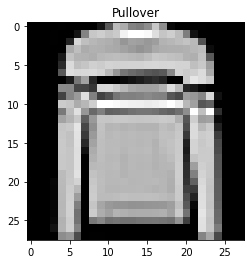

In [9]:
plot_img(5,[X_train,Y_train_FMnist])

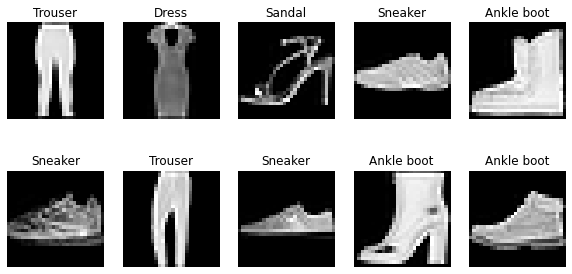

In [10]:
plt.figure(figsize=(10,5))
n = 1
for i in range(80,90):
  plt.subplot(2,5,n)
  plt.axis("off")
  plt.imshow(np.array(X_train[i]).reshape(28,28),cmap="gray")
  plt.title(class_names[Y_train_FMnist[i]]) # Here 0s are black and the white(shades) are 1s(greater than 0)
  n+=1

#$BaseLine$
---
`A base small model, as a threshold for other models performance`

---

In [15]:
Baseline_model = keras.Sequential([
                             layers.Conv2D(64,5,2,padding="same",activation="relu",kernel_initializer="he_normal",input_shape=(28,28,1)),
                             layers.MaxPool2D(padding="same"),
                             layers.Conv2D(128,3,1,padding="same",activation="relu",kernel_initializer="he_normal"),
                             layers.GlobalAveragePooling2D(),
                             layers.Flatten(),
                             layers.Dense(64,activation="relu",kernel_initializer="he_normal"),
                             layers.Dropout(0.5),
                             layers.Dense(10,activation="softmax",kernel_initializer="glorot_uniform"),
])
Baseline_model.compile(
    loss=keras.losses.sparse_categorical_crossentropy,
    optimizer="adam",
    metrics=["accuracy"]
)
Baseline_model.fit(
    X_train,Y_train,
    validation_data=(X_valid,Y_valid),
    epochs=50,
    callbacks=[keras.callbacks.EarlyStopping(patience=3)]
)
print(f"Eval : {Baseline_model.evaluate(X_test,Y_test_FMnist)}")

313/313 [==============================] - 1s 4ms/step - loss: 0.3073 - accuracy: 0.8910
Eval : [0.30727022886276245, 0.890999972820282]


In [24]:
baseline_stats = [0.30727022886276245, 0.890999972820282]

#$Models$
---
`Trying out different architectures and improving them`

---

##$Model_v1$

In [11]:
Model_v1 = keras.Sequential([
                             layers.Conv2D(64,5,2,padding="same",activation="relu",kernel_initializer="he_normal",input_shape=(28,28,1)),
                             layers.MaxPool2D(padding="same"),
                             layers.Conv2D(128,3,1,padding="same",activation="relu",kernel_initializer="he_normal"),
                             layers.MaxPool2D(padding="same"),
                             layers.Conv2D(256,3,1,padding="same",activation="relu",kernel_initializer="he_normal"),
                             layers.GlobalAveragePooling2D(),
                             layers.Flatten(),
                             layers.BatchNormalization(),
                             layers.Dense(128,activation="relu",kernel_initializer="he_normal"),
                             layers.Dropout(0.5),
                             layers.Dense(64,activation="relu",kernel_initializer="he_normal"),
                             layers.Dense(10,activation="softmax",kernel_initializer="glorot_uniform"),
])

In [12]:
Model_v1.compile(
    loss=keras.losses.sparse_categorical_crossentropy,
    optimizer="adam",
    metrics=["accuracy"]
)

In [14]:
Model_v1.fit(
    X_train,Y_train,
    validation_data=(X_valid,Y_valid),
    epochs=100,
    callbacks=[keras.callbacks.EarlyStopping(patience=3)]
)

Epoch 1/100
1250/1250 [==============================] - 22s 16ms/step - loss: 0.6254 - accuracy: 0.7751 - val_loss: 0.5537 - val_accuracy: 0.8143
Epoch 2/100
1250/1250 [==============================] - 16s 13ms/step - loss: 0.3981 - accuracy: 0.8589 - val_loss: 0.4725 - val_accuracy: 0.8383
Epoch 3/100
1250/1250 [==============================] - 16s 13ms/step - loss: 0.3364 - accuracy: 0.8811 - val_loss: 0.2984 - val_accuracy: 0.8931
Epoch 4/100
1250/1250 [==============================] - 16s 13ms/step - loss: 0.3018 - accuracy: 0.8917 - val_loss: 0.3102 - val_accuracy: 0.8876
Epoch 5/100
1250/1250 [==============================] - 17s 14ms/step - loss: 0.2753 - accuracy: 0.9004 - val_loss: 0.3558 - val_accuracy: 0.8722
Epoch 6/100
1250/1250 [==============================] - 17s 14ms/step - loss: 0.2580 - accuracy: 0.9069 - val_loss: 0.2855 - val_accuracy: 0.9014
Epoch 7/100
1250/1250 [==============================] - 18s 14ms/step - loss: 0.2367 - accuracy: 0.9139 - val_loss: 0

There is a little bit of overfitting

In [16]:
print(f"Eval : {Model_v1.evaluate(X_test,Y_test_FMnist)}")

313/313 [==============================] - 2s 5ms/step - loss: 0.2987 - accuracy: 0.9024
Eval : [0.29866519570350647, 0.902400016784668]


In [27]:
Model_v1_stats = [0.29866519570350647, 0.902400016784668]

This is better than the base model.

##$Model_v2$

In [25]:
Model_v2 = keras.Sequential([
                             layers.Conv2D(64,5,2,padding="same",activation="relu",kernel_initializer="he_normal",input_shape=(28,28,1)),
                             layers.MaxPool2D(),
                             layers.Conv2D(128,3,1,padding="same",activation="relu",kernel_initializer="he_normal"),
                             layers.MaxPool2D(),
                             layers.Conv2D(128,3,1,padding="same",activation="relu",kernel_initializer="he_normal"),
                             layers.GlobalAveragePooling2D(),
                             layers.Flatten(),
                             layers.Dense(64,activation="relu",kernel_initializer="he_normal"),
                             layers.Dropout(0.5),
                             layers.Dense(10,activation="softmax",kernel_initializer="glorot_uniform"),
])
Model_v2.compile(
    loss=keras.losses.sparse_categorical_crossentropy,
    optimizer="adam",
    metrics=["accuracy"]
)
Model_v2.fit(
    X_train,Y_train,
    validation_data=(X_valid,Y_valid),
    epochs=100,
    callbacks=[keras.callbacks.EarlyStopping(patience=3)]
)

Epoch 1/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.7739 - accuracy: 0.7200 - val_loss: 0.4237 - val_accuracy: 0.8400
Epoch 2/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.4546 - accuracy: 0.8414 - val_loss: 0.3502 - val_accuracy: 0.8734
Epoch 3/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.3765 - accuracy: 0.8698 - val_loss: 0.3358 - val_accuracy: 0.8773
Epoch 4/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.3266 - accuracy: 0.8884 - val_loss: 0.3010 - val_accuracy: 0.8953
Epoch 5/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.2916 - accuracy: 0.9000 - val_loss: 0.2799 - val_accuracy: 0.8982
Epoch 6/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.2624 - accuracy: 0.9086 - val_loss: 0.2832 - val_accuracy: 0.8974
Epoch 7/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.2365 - accuracy: 0.9174 - val_loss: 0

This is again overfitting

In [26]:
print(f"Eval : {Model_v2.evaluate(X_test,Y_test_FMnist)}")

313/313 [==============================] - 2s 5ms/step - loss: 0.3055 - accuracy: 0.9053
Eval : [0.30554068088531494, 0.9053000211715698]


In [28]:
Model_v2_stats = [0.30554068088531494, 0.9053000211715698]

##$Model_v3$

In [ ]:
Model_v3 = keras.Sequential([
                             layers.Conv2D(32,3,1,padding="same",activation="relu",kernel_initializer="he_normal",input_shape=(28,28,1)),
                             layers.MaxPool2D(),
                             layers.Conv2D(64,3,1,padding="same",activation="relu",kernel_initializer="he_normal"),
                             layers.Conv2D(64,3,1,padding="same",activation="relu",kernel_initializer="he_normal"),
                             layers.GlobalAveragePooling2D(),
                             layers.Flatten(),
                             layers.BatchNormalization(),
                             layers.Dense(32,activation="relu",kernel_initializer="he_normal"),
                             layers.Dropout(0.5),
                             layers.Dense(10,activation="softmax",kernel_initializer="glorot_uniform"),
])
Model_v3.compile(
    loss=keras.losses.sparse_categorical_crossentropy,
    optimizer="adam",
    metrics=["accuracy"]
)
Model_v3.fit(
    X_train,Y_train,
    validation_data=(X_valid,Y_valid),
    epochs=100,
    callbacks=[keras.callbacks.EarlyStopping(patience=3)]
)

In [31]:
Model_v3_stats = Model_v3.evaluate(X_test,Y_test_FMnist)

313/313 [==============================] - 2s 7ms/step - loss: 0.3671 - accuracy: 0.8708


In [33]:
print(f"Eval : {Model_v3_stats[0],Model_v3_stats[1]}")

Eval : (0.367096871137619, 0.8708000183105469)


That's bad than baseline

##$Model_v4$

In [35]:
Model_v4 = keras.Sequential([
                             layers.Conv2D(32,5,2,padding="same",activation="relu",kernel_initializer="he_normal",input_shape=(28,28,1)),
                             layers.MaxPool2D(),
                             layers.Conv2D(64,3,1,padding="same",activation="relu",kernel_initializer="he_normal"),
                             layers.MaxPool2D(),
                             layers.Conv2D(64,3,1,padding="same",activation="relu",kernel_initializer="he_normal"),
                             layers.GlobalAveragePooling2D(),
                             layers.Flatten(),
                             layers.Dense(10,activation="softmax",kernel_initializer="glorot_uniform"),
])
Model_v4.compile(
    loss=keras.losses.sparse_categorical_crossentropy,
    optimizer="adam",
    metrics=["accuracy"]
)
Model_v4.fit(
    X_train,Y_train,
    validation_data=(X_valid,Y_valid),
    epochs=100,
    callbacks=[keras.callbacks.EarlyStopping(patience=3)]
)
Model_v4_stats = Model_v4.evaluate(X_test,Y_test_FMnist)
print(f"Eval : {Model_v4_stats[0],Model_v4_stats[1]}")

Epoch 1/100
1250/1250 [==============================] - 8s 6ms/step - loss: 0.6319 - accuracy: 0.7702 - val_loss: 0.4541 - val_accuracy: 0.8371
Epoch 2/100
1250/1250 [==============================] - 8s 6ms/step - loss: 0.4066 - accuracy: 0.8531 - val_loss: 0.3829 - val_accuracy: 0.8609
Epoch 3/100
1250/1250 [==============================] - 8s 7ms/step - loss: 0.3488 - accuracy: 0.8732 - val_loss: 0.3555 - val_accuracy: 0.8697
Epoch 4/100
1250/1250 [==============================] - 7s 6ms/step - loss: 0.3138 - accuracy: 0.8848 - val_loss: 0.3211 - val_accuracy: 0.8824
Epoch 5/100
1250/1250 [==============================] - 8s 7ms/step - loss: 0.2875 - accuracy: 0.8964 - val_loss: 0.2881 - val_accuracy: 0.8944
Epoch 6/100
1250/1250 [==============================] - 8s 7ms/step - loss: 0.2657 - accuracy: 0.9027 - val_loss: 0.3009 - val_accuracy: 0.8900
Epoch 7/100
1250/1250 [==============================] - 8s 7ms/step - loss: 0.2496 - accuracy: 0.9089 - val_loss: 0.2772 - val_ac

This have same results as Model_v1 and Model_v2 but this is much smaller.

##$Model_v5$

In [36]:
Model_v5 = keras.Sequential([
                             layers.Conv2D(64,5,2,padding="same",activation="relu",kernel_initializer="he_normal",input_shape=(28,28,1)),
                             layers.MaxPool2D(),
                             layers.Conv2D(128,3,1,padding="same",activation="relu",kernel_initializer="he_normal"),
                             layers.GlobalAveragePooling2D(),
                             layers.Flatten(),
                             layers.Dense(10,activation="softmax",kernel_initializer="glorot_uniform"),
])
Model_v5.compile(
    loss=keras.losses.sparse_categorical_crossentropy,
    optimizer="adam",
    metrics=["accuracy"]
)
Model_v5.fit(
    X_train,Y_train,
    validation_data=(X_valid,Y_valid),
    epochs=100,
    callbacks=[keras.callbacks.EarlyStopping(patience=3)]
)
Model_v5_stats = Model_v5.evaluate(X_test,Y_test_FMnist)
print(f"Eval : {Model_v5_stats[0],Model_v5_stats[1]}")

1250/1250 [==============================] - 9s 7ms/step - loss: 0.3216 - accuracy: 0.8845 - val_loss: 0.3434 - val_accuracy: 0.8760
Epoch 12/100
1250/1250 [==============================] - 9s 7ms/step - loss: 0.3090 - accuracy: 0.8880 - val_loss: 0.3110 - val_accuracy: 0.8891
Epoch 13/100
1250/1250 [==============================] - 9s 7ms/step - loss: 0.3009 - accuracy: 0.8906 - val_loss: 0.3117 - val_accuracy: 0.8879
Epoch 14/100
1250/1250 [==============================] - 8s 6ms/step - loss: 0.2961 - accuracy: 0.8930 - val_loss: 0.3316 - val_accuracy: 0.8822
Epoch 15/100
313/313 [==============================] - 1s 4ms/step - loss: 0.3403 - accuracy: 0.8805
Eval : (0.34027916193008423, 0.8805000185966492)


Bad than the BaseLine

##$Model_v6$

In [37]:
Model_v6 = keras.Sequential([
                             layers.Conv2D(64,5,2,padding="same",activation="relu",kernel_initializer="he_normal",input_shape=(28,28,1)),
                             layers.MaxPool2D(),
                             layers.Conv2D(64,3,1,padding="valid",activation="relu",kernel_initializer="he_normal"),
                             layers.Conv2D(128,3,1,padding="valid",activation="relu",kernel_initializer="he_normal"),
                             layers.GlobalAveragePooling2D(),
                             layers.Flatten(),
                             layers.BatchNormalization(),
                             layers.Dense(10,activation="softmax",kernel_initializer="glorot_uniform"),
])
Model_v6.compile(
    loss=keras.losses.sparse_categorical_crossentropy,
    optimizer="adam",
    metrics=["accuracy"]
)
Model_v6.fit(
    X_train,Y_train,
    validation_data=(X_valid,Y_valid),
    epochs=100,
    callbacks=[keras.callbacks.EarlyStopping(patience=3)]
)
Model_v6_stats = Model_v6.evaluate(X_test,Y_test_FMnist)
print(f"Eval : {Model_v6_stats[0],Model_v6_stats[1]}")

Epoch 1/100
1250/1250 [==============================] - 11s 8ms/step - loss: 0.5114 - accuracy: 0.8132 - val_loss: 0.5065 - val_accuracy: 0.8192
Epoch 2/100
1250/1250 [==============================] - 9s 7ms/step - loss: 0.3486 - accuracy: 0.8734 - val_loss: 0.3618 - val_accuracy: 0.8745
Epoch 3/100
1250/1250 [==============================] - 9s 7ms/step - loss: 0.2964 - accuracy: 0.8895 - val_loss: 0.3994 - val_accuracy: 0.8537
Epoch 4/100
1250/1250 [==============================] - 9s 7ms/step - loss: 0.2697 - accuracy: 0.9025 - val_loss: 0.2829 - val_accuracy: 0.8967
Epoch 5/100
1250/1250 [==============================] - 10s 8ms/step - loss: 0.2431 - accuracy: 0.9099 - val_loss: 0.3252 - val_accuracy: 0.8890
Epoch 6/100
1250/1250 [==============================] - 9s 7ms/step - loss: 0.2217 - accuracy: 0.9187 - val_loss: 0.3015 - val_accuracy: 0.8956
Epoch 7/100
313/313 [==============================] - 2s 5ms/step - loss: 0.3105 - accuracy: 0.8945
Eval : (0.3104722499847412,

This is bad

#$Comparision$
---
`Choosing Final Model`

---

In [39]:
Loss_stats = [Model_v1_stats[0],Model_v2_stats[0], Model_v3_stats[0], Model_v4_stats[0], Model_v5_stats[0], Model_v6_stats[0]]

In [40]:
Acc_stats = [Model_v1_stats[1],Model_v2_stats[1], Model_v3_stats[1], Model_v4_stats[1], Model_v5_stats[1], Model_v6_stats[1]]

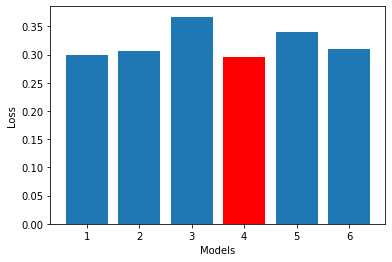

In [50]:
x_axis = [1,2,3,4,5,6]
idx = Loss_stats.index(min(Loss_stats)) + 1
plt.bar(x_axis,Loss_stats)
plt.bar(idx,min(Loss_stats),color="r")
plt.xlabel("Models")
plt.ylabel("Loss")
plt.show()

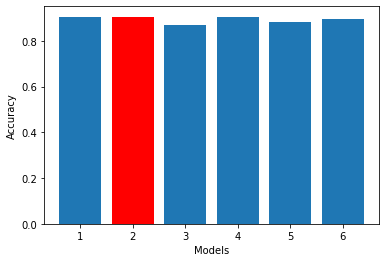

In [52]:
x_axis = [1,2,3,4,5,6]
idx = Acc_stats.index(max(Acc_stats)) + 1
plt.bar(x_axis,Acc_stats)
plt.bar(idx,max(Acc_stats),color="r")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

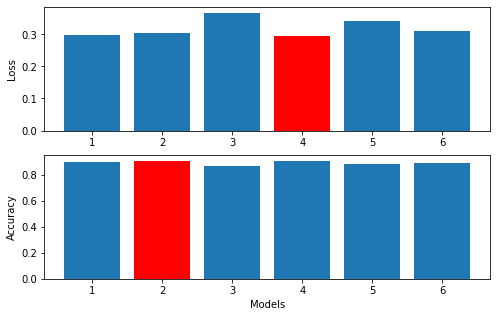

In [68]:
plt.figure(figsize=(8,5))
plt.subplot(211)
x_axis = [1,2,3,4,5,6]
idx = Loss_stats.index(min(Loss_stats)) + 1
plt.bar(x_axis,Loss_stats)
plt.bar(idx,min(Loss_stats),color="r")
plt.ylabel("Loss")
plt.subplot(212)
x_axis = [1,2,3,4,5,6]
idx = Acc_stats.index(max(Acc_stats)) + 1
plt.bar(x_axis,Acc_stats)
plt.bar(idx,max(Acc_stats),color="r")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

From this we can conclude that Model_v4 is the most robust/best model for Fashion Mnist.

#$Predicting$
---
`Using the best model so far to predict the classes`

---

In [71]:
def predictions(id):
  y_pred = np.argmax(Model_v4.predict(np.array(X_test[id]).reshape(1,28,28)))
  y_target = Y_test_FMnist[id]
  return y_pred, y_target

In [72]:
predictions(5) # Predicted value and Original Value

(1, 1)

In [78]:
for i in range(45,78):
  y_pred, original = predictions(i)
  print(f"Index : {i}")
  print(f"Predicted : {y_pred} Original : {original}")
  if y_pred != original:
    print(f"Wrong Prediction, Index : {i}")

Index : 45
Predicted : 7 Original : 7
Index : 46
Predicted : 2 Original : 2
Index : 47
Predicted : 1 Original : 1
Index : 48
Predicted : 2 Original : 2
Index : 49
Predicted : 6 Original : 2
Wrong Prediction, Index : 49
Index : 50
Predicted : 4 Original : 4
Index : 51
Predicted : 4 Original : 4
Index : 52
Predicted : 5 Original : 5
Index : 53
Predicted : 8 Original : 8
Index : 54
Predicted : 2 Original : 2
Index : 55
Predicted : 2 Original : 2
Index : 56
Predicted : 8 Original : 8
Index : 57
Predicted : 4 Original : 4
Index : 58
Predicted : 8 Original : 8
Index : 59
Predicted : 0 Original : 0
Index : 60
Predicted : 7 Original : 7
Index : 61
Predicted : 7 Original : 7
Index : 62
Predicted : 8 Original : 8
Index : 63
Predicted : 5 Original : 5
Index : 64
Predicted : 1 Original : 1
Index : 65
Predicted : 1 Original : 1
Index : 66
Predicted : 3 Original : 2
Wrong Prediction, Index : 66
Index : 67
Predicted : 3 Original : 3
Index : 68
Predicted : 7 Original : 9
Wrong Prediction, Index : 68
I

49, 66 and 68 index were wrong predictions, lets look at them.

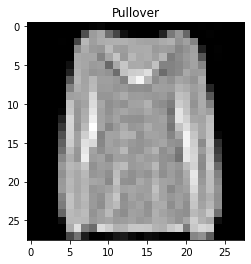

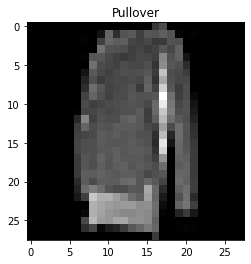

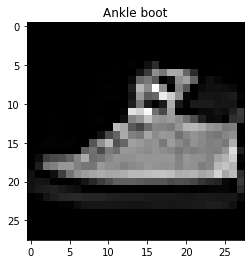

In [80]:
wrong_idx = [49,66,68]
for i in wrong_idx:
  plot_img(i,[X_test,Y_test_FMnist])

I guess model was not able to grasp patterns for the class "Pullovers"

In [92]:
def Model_predictions(start,end,plot):
  wrong_idx = []
  for i in range(start,end):
    y_pred, original = predictions(i)
    if y_pred != original:
      print(f"Wrong Prediction!!! Index : {i} \n Predicted : {class_names[y_pred]} & Original = {class_names[original]} ")
      wrong_idx.append(i)
  if plot:
    for i in wrong_idx:
      plot_img(i,[X_test,Y_test_FMnist])

In [94]:
Model_predictions(102,150,False)

Wrong Prediction!!! Index : 103 
 Predicted : Shirt & Original = Pullover 
Wrong Prediction!!! Index : 107 
 Predicted : Sneaker & Original = Ankle boot 
Wrong Prediction!!! Index : 136 
 Predicted : Shirt & Original = Pullover 
Wrong Prediction!!! Index : 147 
 Predicted : Dress & Original = Shirt 


Yeah, my assumption was true. The Model is not able to learn patterns for the pullover class.

Wrong Prediction!!! Index : 870 
 Predicted : Shirt & Original = Pullover 
Wrong Prediction!!! Index : 881 
 Predicted : Bag & Original = T_shirt 
Wrong Prediction!!! Index : 893 
 Predicted : Coat & Original = Pullover 
Wrong Prediction!!! Index : 902 
 Predicted : Ankle boot & Original = Sandal 
Wrong Prediction!!! Index : 905 
 Predicted : Shirt & Original = Coat 
Wrong Prediction!!! Index : 909 
 Predicted : Pullover & Original = Shirt 


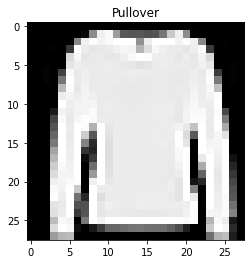

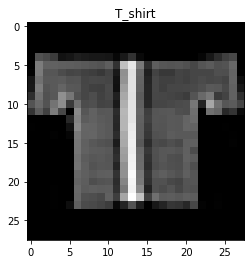

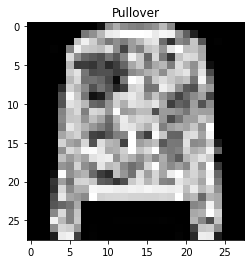

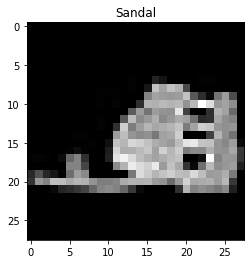

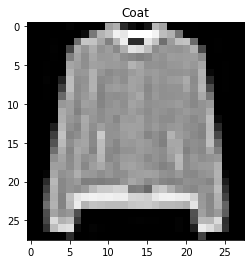

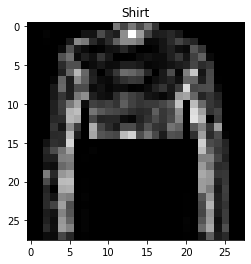

In [95]:
Model_predictions(865,912,True)

#$Decision$ $Params$
---
`Using more methods to compare the model like precision and recall`

---

In [174]:
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score

In [133]:
Models = [Model_v1,Model_v2,Model_v3,Model_v4,Model_v5,Model_v6]

In [134]:
Y_pred = []
for i in range(6):
  Y_pred.append(np.argmax(Models[i].predict(X_test),axis=1))

In [135]:
Precisions = []
for y_pred in Y_pred:
  Precisions.append(precision_score(Y_test_FMnist,y_pred,average='macro'))

Recall = []
for y_pred in Y_pred:
  Recall.append(recall_score(Y_test_FMnist,y_pred,average='macro'))

CM = []
for y_pred in Y_pred:
  CM.append(confusion_matrix(Y_test_FMnist,y_pred))

F1 = []
for y_pred in Y_pred:
  F1.append(f1_score(Y_test_FMnist,y_pred,average='macro'))

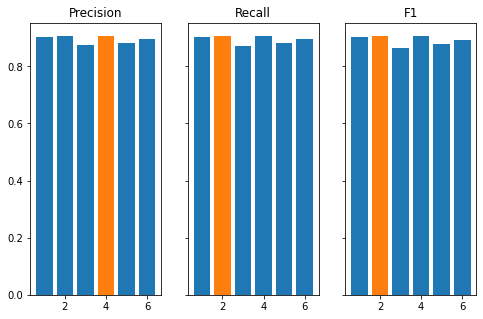

In [155]:
x_axis = [1,2,3,4,5,6]
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharex=True,sharey=True,)

ax1.bar(x_axis,Precisions)
idx = Precisions.index(max(Precisions)) +1
ax1.bar(idx,max(Precisions))
ax1.set_title("Precision")

ax2.bar(x_axis,Recall)
idx = Recall.index(max(Recall)) +1
ax2.bar(idx,max(Recall))
ax2.set_title("Recall")

ax3.bar(x_axis,F1)
idx = F1.index(max(F1)) +1
ax3.bar(idx,max(F1))
ax3.set_title("F1")

f.set_figheight(5)
f.set_figwidth(8)

According to this Model 2 is better than Model 4. Lets find out.

In [176]:
# for i in range(6):
#   print(f"Model-{i+1}")
#   print(f"CM : {CM[i]}")

# # Only Run if yoy wanna look at them|.

In [164]:
def predictions_v2(id):
  y_pred = np.argmax(Model_v2.predict(np.array(X_test[id]).reshape(1,28,28)))
  y_target = Y_test_FMnist[id]
  return y_pred, y_target
def Model_predictions_v2(start,end):
  wrong_counter = 0
  for i in range(start,end):
    y_pred, original = predictions_v2(i)
    if y_pred != original:
      wrong_counter+=1
  return wrong_counter

def predictions_v4(id):
  y_pred = np.argmax(Model_v4.predict(np.array(X_test[id]).reshape(1,28,28)))
  y_target = Y_test_FMnist[id]
  return y_pred, y_target
def Model_predictions_v4(start,end):
  wrong_counter = 0
  for i in range(start,end):
    y_pred, original = predictions_v4(i)
    if y_pred != original:
      wrong_counter+=1
  return wrong_counter


The idea is simple, with a step size of 10. We will check that in 10 steps which model made wrong predictions greater than the other. 

In [179]:
V2_wrongs = []
V4_wrongs = []
k = 100
for i in range(10):
  for j in range(1):
    n_wrong_v2 = Model_predictions_v2(k,k+100)
    n_wrong_v4 = Model_predictions_v4(k,k+100)
    V2_wrongs.append(n_wrong_v2)
    V4_wrongs.append(n_wrong_v4)
    print(f"K : {k,k+100} Wrong V2 : {n_wrong_v2} & Wrong v4 : {n_wrong_v4} ")
    k+=100
print(f"V2 Errors : {sum(V2_wrongs)}")
print(f"V4 Errors : {sum(V4_wrongs)}")

K : (100, 200) Wrong V2 : 7 & Wrong v4 : 7 
K : (200, 300) Wrong V2 : 7 & Wrong v4 : 7 
K : (300, 400) Wrong V2 : 12 & Wrong v4 : 9 
K : (400, 500) Wrong V2 : 9 & Wrong v4 : 11 
K : (500, 600) Wrong V2 : 10 & Wrong v4 : 10 
K : (600, 700) Wrong V2 : 8 & Wrong v4 : 9 
K : (700, 800) Wrong V2 : 9 & Wrong v4 : 7 
K : (800, 900) Wrong V2 : 7 & Wrong v4 : 7 
K : (900, 1000) Wrong V2 : 15 & Wrong v4 : 16 
K : (1000, 1100) Wrong V2 : 4 & Wrong v4 : 8 
V2 Errors : 88
V4 Errors : 91


You can check it for different steps or for different range. In general, that's true Model V2 is better than Model V4.

In [173]:
print(f"V2 Acc : {Model_v2_stats[1]}")
print(f"V4 Acc : {Model_v4_stats[1]}")

V2 Acc : 0.9053000211715698
V4 Acc : 0.9046000242233276


Earlier we choosed Model V4 as the best because it seems robust, but now we can clearly see that V2 is much better than V4 when it comes to long term results.